In [23]:
from eval_plot_utils import load_cl_results

df = load_cl_results().sort_values("lin_probe_mean_test_auc")

Num paths found:  363
JSONDecodeError
JSONDecodeError
JSONDecodeError
0.9722222222222222


In [24]:
import matplotlib.pyplot as plt
# set better general font style
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'serif'})
#plt.rcParams.update({'font.serif': ['Times New Roman']})
# set font size of ticks to 12 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


style_kwargs = {"linestyle": "-", "marker": "X", "markersize": 8, "linewidth": 2, "grid": True}

def clean_df(df):
    df = df.loc[:, df.nunique() > 1]
    return df

In [25]:
# analyze missing mode results here once, then delete where it is not "zeros"

if "missing_mode" in df.columns:
    missing_mode_df = df[df["missing_mode"] != "zeros"]
    df = clean_df(df[df["missing_mode"] == "zeros"])
    missing_mode_df

In [26]:
missing_mode_df[missing_mode_df["dataset_size"] == 1.0].iloc[0]

lin_probe_mean_val_auc             0.806618
lin_probe_mean_test_auc            0.775884
val_zero_shot_auc_Impression:_     0.682216
test_zero_shot_auc_Impression:_    0.662552
val_zero_shot_auc_FINDINGS:        0.681729
test_zero_shot_auc_FINDINGS:       0.665835
val_zero_shot_auc_averaged         0.687114
test_zero_shot_auc_averaged        0.669183
model_name                         ViT-B/32
mode                               adapters
lr                                   0.0003
sent_frac                               1.0
randomize_order                           1
max_epochs                               10
sl_max_epochs                          10.0
batch_size                              192
adjust_grad_acc_to                      0.0
dataset_size                            1.0
sl_dataset_size                         1.0
text2img_num_steps                      500
text2img_num_feats                        4
mixup_alpha                             0.0
adapter_flow                    

In [27]:
df.columns

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged',
       'model_name', 'mode', 'lr', 'sent_frac', 'randomize_order',
       'max_epochs', 'batch_size', 'adjust_grad_acc_to', 'dataset_size',
       'sl_dataset_size', 'text2img_num_steps', 'text2img_num_feats',
       'mixup_alpha', 'adapter_flow', 'seed', 'num_gpus', 'strategy',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc', 'cyclic_lambda',
       'text2img_batch_size'],
      dtype='object')

In [28]:
df.sort_values("rsna_mean_test_auc", ascending=False).head(5)

,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,model_name,mode,...,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc,cyclic_lambda,text2img_batch_size
0,0.813068,0.783242,0.719329,0.686309,0.740033,0.693172,0.730907,0.692204,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.802035,0.881845,0.0,4.0
0,0.806084,0.779796,0.699500,0.667397,0.698485,0.659579,0.700064,0.665562,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801181,0.879394,0.0,4.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
0,0.809832,0.775284,0.685329,0.663676,0.683193,0.675906,0.686371,0.672584,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.799313,0.859640,0.0,NaN
0,0.806472,0.778559,0.699135,0.677100,0.703661,0.674945,0.704619,0.679060,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.800728,0.874240,0.0,8.0


In [29]:
# analyze models here

if "model_name" in df.columns:
    model_df = df[df["model_name"] != "ViT-B/32"]
    df = clean_df(df[df["model_name"] == "ViT-B/32"])
    model_df

In [30]:
model_df

,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,model_name,mode,...,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc,cyclic_lambda,text2img_batch_size
0,0.776465,0.736308,0.707131,0.663857,0.708503,0.666429,0.708347,0.665460,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.766867,0.848440,0.0,8.0
0,0.801125,0.765891,0.697422,0.676473,0.695761,0.679782,0.697714,0.678861,ViT-L/14,adapters,...,0.746267,0.786378,0.765294,0.802701,0.674921,0.729547,0.790562,0.872204,0.0,NaN
0,0.806472,0.778559,0.699135,0.677100,0.703661,0.674945,0.704619,0.679060,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.800728,0.874240,0.0,8.0
0,0.806084,0.779796,0.699500,0.667397,0.698485,0.659579,0.700064,0.665562,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801181,0.879394,0.0,4.0
0,0.813068,0.783242,0.719329,0.686309,0.740033,0.693172,0.730907,0.692204,ViT-L/14,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,0.802035,0.881845,0.0,4.0
0,0.821195,0.787921,0.684441,0.652465,0.646897,0.640613,0.672871,0.649897,RN50,adapters,...,0.587608,0.636786,0.604993,0.658702,NaN,NaN,0.799991,0.867661,0.0,NaN


In [31]:
model_df.iloc[-2]

lin_probe_mean_val_auc             0.813068
lin_probe_mean_test_auc            0.783242
val_zero_shot_auc_Impression:_     0.719329
test_zero_shot_auc_Impression:_    0.686309
val_zero_shot_auc_FINDINGS:        0.740033
test_zero_shot_auc_FINDINGS:       0.693172
val_zero_shot_auc_averaged         0.730907
test_zero_shot_auc_averaged        0.692204
model_name                         ViT-L/14
mode                               adapters
lr                                  0.00001
sent_frac                               1.0
randomize_order                           1
max_epochs                               10
batch_size                               16
adjust_grad_acc_to                      0.0
dataset_size                            1.0
sl_dataset_size                         1.0
text2img_num_steps                      500
text2img_num_feats                        0
mixup_alpha                             0.0
adapter_flow                           easy
seed                            

In [32]:
full_df = df[df["dataset_size"] == 1.0]
full_df = full_df[full_df["randomize_order"] == 1]
full_df = full_df[full_df["lr"] == 1e-4]
full_df = full_df[full_df["mode"] == "adapters"]
full_df = full_df[full_df["adapter_flow"] == "easy"]
full_df = full_df[full_df["batch_size"] == 192]
full_df = full_df.loc[:, full_df.nunique() > 1].sort_values("max_epochs")
full_df

,lin_probe_mean_val_auc,lin_probe_mean_test_auc,max_epochs,seed,fixed_ds_subsampling_seed,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc
0,0.785477,0.754348,3,0,0.0,0.772983,0.802610,NaN,NaN
0,0.794968,0.764932,5,0,0.0,0.770288,0.802432,0.771470,0.803299
0,0.805154,0.770259,10,0,0.0,NaN,NaN,0.773282,0.805711
0,0.804300,0.770648,10,10,1.0,NaN,NaN,NaN,NaN
0,0.804300,0.770648,10,10,1.0,NaN,NaN,NaN,NaN
0,0.807637,0.772497,10,11,1.0,NaN,NaN,NaN,NaN
0,0.807637,0.772497,10,11,1.0,NaN,NaN,NaN,NaN
0,0.808090,0.773560,10,0,0.0,0.776299,0.804181,0.778048,0.805250
0,0.808675,0.779962,20,0,0.0,0.776250,0.806003,0.777036,0.806040
0,0.809397,0.778396,50,0,0.0,0.773929,0.801503,0.774112,0.808301


   lin_probe_mean_val_auc  lin_probe_mean_test_auc  text2img_num_feats  \
0                0.736627                 0.685665                   0   
0                0.741208                 0.688566                   4   
0                0.740817                 0.692660                   4   
0                0.746979                 0.692671                   0   
0                0.746979                 0.692671                   0   
0                0.743184                 0.700738                   4   
0                0.755753                 0.706810                   0   
0                0.751696                 0.707358                   0   
0                0.748074                 0.709392                   0   
0                0.748074                 0.709392                   0   
0                     NaN                      NaN                   0   
0                     NaN                      NaN                   0   

  adapter_flow  seed  adapters_test_a

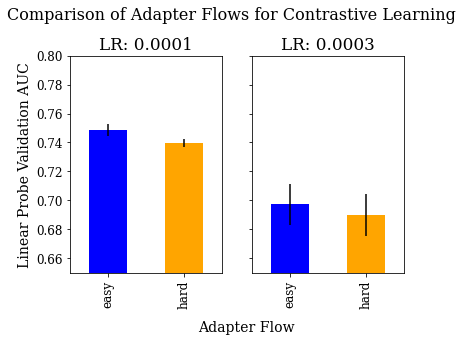

In [33]:
import matplotlib.pyplot as plt

# eval adapter flows: easy vs hard vs correct

# there seems to be a difference in the performance of full_sl - with easy adapters it has same perf as with adapter_sl

# TODO: eval the runs I started on 10% of data with 3e-4, adapter.

tenth = df[df["dataset_size"] == 0.1]
tenth = tenth[tenth["mode"] == "adapters"]
tenth = tenth[tenth["randomize_order"] == 1]
tenth = tenth[tenth["sent_frac"] == 1]
tenth = tenth[tenth["max_epochs"] == 10]
tenth = tenth[tenth["mixup_alpha"] == 0.0]
#tenth = tenth[tenth["fixed_ds_subsampling_seed"] == 1]


metric = "lin_probe_mean_val_auc"

# create figure with two subtplots next to each other that share the y-axis 
fig, axs = plt.subplots(1, 2, sharey=True)


import seaborn as sns

for i, lr in enumerate([1e-4, 3e-4]):
    sub = tenth[tenth["lr"] == lr]
    print(clean_df(sub))
    means = sub.groupby("adapter_flow").mean().reset_index()
    std = sub.groupby("adapter_flow").std().reset_index()
    means["std"] = std["lin_probe_mean_val_auc"]
    print(std[metric])
    ax = axs[i]
    # set bar color depending on adapter_floiw (easy == blue, hard== red)
    means.plot.bar(x="adapter_flow", y=metric, legend=False, 
                    yerr="std", ax=ax, color=["blue", "orange"],)
    #sns.barplot(x="adapter_flow", y=metric, data=means, ax=ax, yerr="std")#, color=["blue", "red"])
    

    ax.set_title(f"LR: {lr}")
    
    print(means[metric])
    plt.ylim(0.65, 0.8)
    
    
# set ylabel for whole figure
axs[0].set_ylabel("Linear Probe Validation AUC")
# delete x-label for axes
for ax in axs: 
    ax.set_xlabel("")
# create x-label for first subplot and move it to the right
axs[0].set_xlabel("Adapter Flow", labelpad=10)
axs[0].xaxis.set_label_coords( 1.16, -0.22)
fig.suptitle("Comparison of Adapter Flows for Contrastive Learning", fontsize=16, y=1.05)
#plt.title("Comparison of Adapter Flows for two learning rates", y=1.08)
# move title higher above the figure
#plt.subplots_adjust(top=0.6)
# drop unnecessary columns
sub = sub.loc[:, sub.nunique() > 1]
sub

save_folder = "plots/cl/"
import os
os.makedirs(save_folder, exist_ok=True)
fig.savefig(f"{save_folder}/adapter_flows_compare_lr.pdf", bbox_inches="tight")

In [34]:
df.columns

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'mode',
       'lr', 'sent_frac', 'randomize_order', 'max_epochs', 'batch_size',
       'adjust_grad_acc_to', 'dataset_size', 'sl_dataset_size',
       'text2img_num_steps', 'text2img_num_feats', 'mixup_alpha',
       'adapter_flow', 'seed', 'num_gpus', 'strategy',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc', 'cyclic_lambda'],
      dtype='object')

   lin_probe_mean_val_auc  lin_probe_mean_test_auc  sent_frac  \
0                0.733465                 0.682055        0.6   
0                0.733465                 0.682055        1.0   
0                0.736627                 0.685665        0.6   
0                0.736627                 0.685665        1.0   
0                0.741208                 0.688566        1.0   
0                0.740817                 0.692660        1.0   
0                0.746979                 0.692671        0.6   
0                0.746979                 0.692671        0.6   
0                0.746979                 0.692671        1.0   
0                0.746979                 0.692671        1.0   
0                0.749515                 0.699464        1.0   
0                0.749515                 0.699464        0.6   
0                0.743184                 0.700738        1.0   
0                0.751195                 0.705582        0.6   
0                0.751195

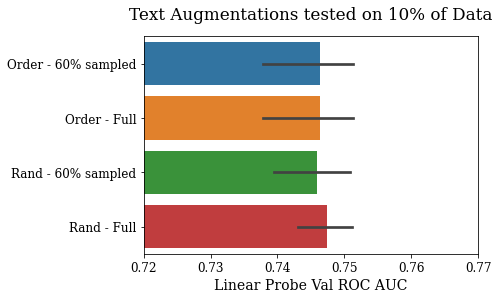

In [35]:
# eval sent frac and randomize order

# for 10% of data

tenth_df = df[df["dataset_size"] == 0.1]
tenth_df = tenth_df[tenth_df["lr"] == 1e-4]
tenth_df = tenth_df[tenth_df["max_epochs"] == 10]
tenth_df = tenth_df[tenth_df["mode"] == "adapters"]
tenth = tenth[tenth["mixup_alpha"] == 0.0]

#tenth_df = tenth_df.loc[:, tenth_df.nunique() > 1]

sent_frac_str = tenth_df["sent_frac"].map({0.6: "60% sampled", 1: "Full"})
randomize_str = tenth_df["randomize_order"].map({1: "Rand", 0: "Order"})
tenth_df["type"] = randomize_str + " - " + sent_frac_str
print(clean_df(tenth_df))

tenth_df = tenth_df.groupby("type").apply(lambda x: x.groupby("seed").mean()).reset_index()


import seaborn as sns

print(tenth_df.columns)
ax = sns.barplot(y='type', 
                 x="lin_probe_mean_val_auc", #'lin_probe_mean_test_auc',
                 #hue="type",
                 data=tenth_df, 
                 #hue_order=["Order - 60% sampled", "Order - Full", "Rand - 60% sampled", "Rand - Full"], 
                 )
ax.set_xlim(0.72, 0.77)
#ax.set_ylim(0.96, 0.99)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

plt.ylabel("")
plt.xlabel("Linear Probe Val ROC AUC")
plt.title("Text Augmentations tested on 10% of Data", y=1.05)
means = tenth_df.groupby("type").mean().sort_values("lin_probe_mean_test_auc")
clean_df(means)

# TODO: test with 100 % of data
#full_df = df[df["dataset_size"] == 1]
#full_df = full_df[full_df["lr"] == 1e-5]
#full_df = full_df[full_df["text2img_num_feats"] == 0]


#full_df[full_df["randomize_order"] == 0]

plt.savefig(f"{save_folder}/compare_text_augs.pdf", bbox_inches="tight")

Mean:  0    0.719980
1    0.733857
2    0.763259
3    0.785912
4    0.806186
5    0.807528
6    0.792535
Name: lin_probe_mean_val_auc, dtype: float64
STD:  0    0.001612
1    0.004434
2    0.000820
3    0.002115
4    0.001710
5    0.001589
6         NaN
Name: lin_probe_mean_val_auc, dtype: float64
Mean:  0    0.790180
1    0.802621
2    0.813399
3    0.808357
4    0.801411
5    0.781597
Name: lin_probe_mean_val_auc, dtype: float64
STD:  0    0.001604
1    0.000892
2    0.001542
3    0.003307
4    0.001703
5    0.004849
Name: lin_probe_mean_val_auc, dtype: float64


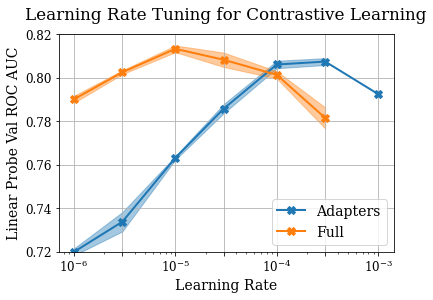

In [36]:

def print_lr_results(df, mode, ax=None):
    lrs_to_test = [1e-6, 3e-6, 1e-5, 3e-5, 1e-4, 3e-4, 1e-3]
    metric = "lin_probe_mean_val_auc"
    
    #  eval lr for full data
    full_df = df[df["dataset_size"] == 1.0]
    full_df = full_df[full_df["randomize_order"] == 1]
    full_df = full_df[full_df["max_epochs"] == 10]
    full_df = full_df[full_df["mode"] == mode]
    full_df = full_df[full_df["sent_frac"] == 1.0]
    
    
    if mode == "adapters":
        full_df = full_df[full_df["adapter_flow"] == "easy"]
        full_df = full_df[full_df["batch_size"] == 192]
    else:
        full_df = full_df[full_df["batch_size"] == 128]

    # filter out lrs that are not tested
    full_df = full_df[full_df["lr"].isin(lrs_to_test)]


    full_df = full_df.loc[:, full_df.nunique() > 1].sort_values("lr")


    # average per seed
    full_df = full_df.groupby("lr").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)
    
    #print(f"{mode} df: \n", full_df)

    # average over seeds
    means = full_df.groupby("lr").mean().reset_index()
    # plot means
    ax = means.plot(x="lr", y=metric, label=mode[0].upper() + mode[1:], ax=ax, **style_kwargs)
    color = ax.lines[-1].get_color()
    
    # ADD ERRORBAR
    std = full_df.groupby("lr").std().reset_index()[metric]
    print("Mean: ", means[metric])
    print("STD: ", std)
    means = means[metric].to_numpy()
    lower, upper = means - std, means + std
    lrs = full_df["lr"].unique()
    ax.fill_between(lrs, lower, upper, alpha=0.4, color=color)
    
    ax.set_title(f"{mode[0].upper() + mode[1:]} LR tuning")
    ax.set_xscale("log")
    ax.set_xticks(lrs_to_test)#(full_df["lr"].unique())
    
    plt.ylim(0.72, 0.82)

ax = plt.figure().gca()
print_lr_results(df, "adapters", ax=ax)
print_lr_results(df, "full", ax=ax)
plt.title("Learning Rate Tuning for Contrastive Learning", y=1.04)
plt.ylabel("Linear Probe Val ROC AUC")
plt.xlabel("Learning Rate")
plt.savefig(f"{save_folder}/lr_tuning.pdf", bbox_inches="tight")

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged',
       'max_epochs', 'text2img_num_steps', 'text2img_num_feats', 'seed',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc'],
      dtype='object')
   lin_probe_mean_val_auc  lin_probe_mean_test_auc  \
0                0.799696                 0.767896   
0                0.795330                 0.768380   
0                0.803918                 0.768993   
0                0.803514                 0.769253   
0                0.802551       

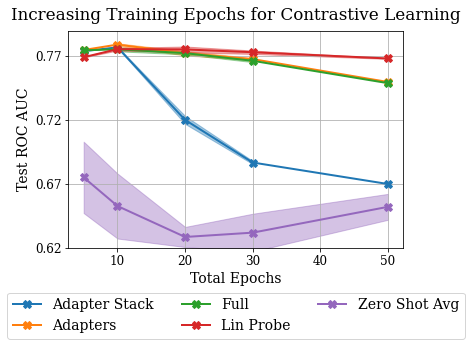

In [37]:
# make plot for full df showing scale with max epochs

full_df = df[df["dataset_size"] == 1.0]
full_df = full_df[full_df["randomize_order"] == 1]
full_df = full_df[full_df["lr"] == 1e-4]
full_df = full_df[full_df["mode"] == "adapters"]
full_df = full_df[full_df["adapter_flow"] == "easy"]
full_df = full_df[full_df["num_gpus"] == 1]
full_df = full_df[full_df["mixup_alpha"] == 0]

full_df = full_df[full_df["batch_size"] == 192]
full_df = full_df.groupby("seed").apply(lambda x: x.groupby("max_epochs").mean().reset_index()).reset_index(drop=True)

full_df = full_df.loc[:, full_df.nunique() > 1].sort_values("max_epochs")

#ax = full_df.groupby("max_epochs").mean().reset_index().plot(x="max_epochs",
#                                                             y=["lin_probe_mean_test_auc",
#                                                                ],#"covid_mean_test_auc"],
#                                                             style="-X")
full_df



#  plot for 3e-4  and more evals
# hypothesis: new_adapters should get better as we increase CL epochs, as the old adapter gets saturated
# does not happen at all!

full_df = df[df["dataset_size"] == 1.0]
full_df = full_df[full_df["randomize_order"] == 1]
full_df = full_df[full_df["lr"] == 3e-4]
full_df = full_df[full_df["mode"] == "adapters"]
full_df = full_df[full_df["adapter_flow"] == "easy"]
full_df = full_df[full_df["num_gpus"] == 1]
full_df = full_df[full_df["mixup_alpha"] == 0]
full_df = full_df[full_df["sl_dataset_size"] == 1.0]

full_df = full_df[full_df["cyclic_lambda"] == 0]

epochs_of_interest = [5, 10, 20, 30, 50]
full_df = full_df[full_df["max_epochs"].isin(epochs_of_interest)]



full_df = full_df[full_df["batch_size"] == 192]
full_df = clean_df(full_df)

print(full_df.columns)
print(full_df)


full_df = full_df.groupby("seed").apply(lambda x: x.groupby("max_epochs").mean().reset_index()).reset_index(drop=True)

full_df = full_df.loc[:, full_df.nunique() > 1].sort_values("max_epochs")

metrics = ["lin_probe_mean_test_auc", "adapters_test_auc", "full_test_auc", "new_adapters_test_auc"]#, "rsna_mean_test_auc"]
metrics += ["test_zero_shot_auc_averaged"]#, "test_zero_shot_auc_Impression:_", "test_zero_shot_auc_FINDINGS:"]

# rename metrics by removing test_auc and underscores 
metric_names = [metric.replace("test_zero_shot_auc_averaged", "Zero Shot Avg") for metric in metrics]
metric_names = [metric.replace("test_zero_shot_auc_Impression:_", "Zero Shot Impression") for metric in metric_names]
metric_names = [metric.replace("test_zero_shot_auc_FINDINGS:", "Zero Shot Findings") for metric in metric_names]
metric_names = [metric.replace("_test_auc", "") for metric in metric_names]
metric_names = [metric.replace("_mean", "") for metric in metric_names]
metric_names = [metric.replace("_", " ") for metric in metric_names]
# capitalize first letter of each word
def capitalize(sentence):
   return " ".join([word[0].upper() + word[1:] for word in sentence.split(" ")])
metric_names = [capitalize(name) for name in metric_names]
metric_names = [f"{m[0].upper() + m[1:]}" for m in metric_names]
metric_names = ["Adapter Stack" if word == "New Adapters" else word for word in metric_names]

# exchange metric names in df
full_df = full_df.rename(columns= {m: n for m, n in zip(metrics, metric_names)})

print(metrics, metric_names)
print(full_df.columns)

means = full_df.groupby("max_epochs").mean().reset_index()
stds = full_df.groupby("max_epochs").std().reset_index()

ax = means.reset_index().plot(x="max_epochs",
                              y=sorted(metric_names),
                           #"covid_mean_test_auc"],
                              **style_kwargs)
# fill std area
for i, metric in enumerate(sorted(metric_names)):
   color = ax.lines[i].get_color()
   lower, upper = means[metric] - stds[metric], means[metric] + stds[metric]
   ax.fill_between(means["max_epochs"], lower, upper, alpha=0.4, color=color)


plt.ylabel("Test ROC AUC")
plt.xlabel("Total Epochs")
plt.ylim(0.62, 0.79)
# make y ticks more sparse
import numpy as np
plt.yticks(np.arange(0.62, 0.8, 0.05))

plt.title("Increasing Training Epochs for Contrastive Learning", y=1.02)


# put legend below
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.45), ncol=3)
clean_df(full_df)
print(full_df.columns)
print(sorted(metric_names))
plt.savefig(f"{save_folder}/more_epochs.pdf", bbox_inches="tight")

In [38]:
full_df.columns

Index(['max_epochs', 'lin_probe_mean_val_auc', 'Lin Probe',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'Zero Shot Avg', 'text2img_num_steps',
       'text2img_num_feats', 'seed', 'fixed_ds_subsampling_seed',
       'covidx_mean_val_auc', 'covidx_mean_test_auc', 'rsna_mean_val_auc',
       'rsna_mean_test_auc', 'Adapters', 'adapters_val_auc', 'Full',
       'full_val_auc', 'Adapter Stack', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc'],
      dtype='object')

In [39]:
df["dataset_size"].unique()

array([0.001, 0.01 , 0.003, 0.005, 0.03 , 1.   , 0.1  , 0.3  ])

In [40]:
full = df[df["mode"] == "full"]
full = clean_df(full).sort_values("full_test_auc")
full = full[full["lr"].astype(float) == 1e-5]
#full = full[full["dataset_size"] == 1.0]

#clean_df(full)

In [41]:
df.columns

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'mode',
       'lr', 'sent_frac', 'randomize_order', 'max_epochs', 'batch_size',
       'adjust_grad_acc_to', 'dataset_size', 'sl_dataset_size',
       'text2img_num_steps', 'text2img_num_feats', 'mixup_alpha',
       'adapter_flow', 'seed', 'num_gpus', 'strategy',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc', 'cyclic_lambda'],
      dtype='object')

In [42]:
# TODO: compare full vs adapter on dataset with best lr

modes = ["adapters", "full"]

best_df_list = []
for mode in modes:
    print(mode)
    best_df = df[df["mode"] == mode]
    
    if mode == "adapters":
        best_df = best_df[best_df["batch_size"] == 192]
        best_df = best_df[best_df["lr"] == 3e-4]
    else:
        best_df = best_df[best_df["batch_size"] == 128]
        best_df = best_df[best_df["lr"] == 1e-5]            
    best_df = best_df[best_df["max_epochs"] == 10]
    best_df = best_df[best_df["dataset_size"] == 1.0]
    best_df = best_df[best_df["sl_dataset_size"] == 1.0]
    best_df = best_df[best_df["adapter_flow"] == "easy"]
    best_df = best_df[best_df["num_gpus"] == 1]
    best_df = best_df[best_df["mixup_alpha"] == 0.0]

    best_df = clean_df(best_df)
    print(clean_df(best_df))
    print(best_df.columns)
    
    best_df = best_df.groupby("seed").mean().reset_index()
    
    best_df["mode"] = mode
    
    best_df_list.append(best_df.mean())
    
    

import pandas as pd
best_df = pd.DataFrame(best_df_list)
#test_cols = [c for c in best_df.columns if "test" in c]

#best_df.plot.bar(x=test_cols, y=test_cols, hue="mode")
best_df.drop(columns=["text2img_num_steps", "text2img_num_feats", "seed", "fixed_ds_subsampling_seed"])#, "text2img_num_steps"])


adapters
   lin_probe_mean_val_auc  lin_probe_mean_test_auc  \
0                0.805522                 0.774172   
0                0.804677                 0.774454   
0                0.809890                 0.774877   
0                0.805842                 0.775193   
0                0.806936                 0.775510   
0                0.809792                 0.775722   
0                0.805970                 0.775987   
0                0.807180                 0.777364   
0                     NaN                      NaN   
0                     NaN                      NaN   
0                     NaN                      NaN   
0                     NaN                      NaN   
0                     NaN                      NaN   

   val_zero_shot_auc_Impression:_  test_zero_shot_auc_Impression:_  \
0                        0.684962                         0.661011   
0                             NaN                              NaN   
0                       

/tmp/ipykernel_3625866/781572221.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_df_list.append(best_df.mean())
/tmp/ipykernel_3625866/781572221.py:31: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  best_df_list.append(best_df.mean())


,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,covidx_mean_val_auc,covidx_mean_test_auc,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,0.990715,0.970854,0.906133,0.906889,0.779005,0.810983,0.775323,0.808960,0.776876,0.807648,0.798729,0.855712
1,0.813399,0.777604,0.708344,0.659855,0.697897,0.657907,0.710837,0.664910,0.991673,0.969467,0.907516,0.906650,0.776759,0.811335,0.774099,0.805173,NaN,NaN,0.800985,0.872298


In [43]:
clean_df(best_df)

,seed,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,text2img_num_feats,...,covidx_mean_val_auc,covidx_mean_test_auc,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,11.818182,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,0.363636,...,0.990715,0.970854,0.906133,0.906889,0.779005,0.810983,0.775323,0.808960,0.798729,0.855712
1,15.428571,0.813399,0.777604,0.708344,0.659855,0.697897,0.657907,0.710837,0.664910,0.285714,...,0.991673,0.969467,0.907516,0.906650,0.776759,0.811335,0.774099,0.805173,0.800985,0.872298


In [44]:
means = best_df.groupby("mode").mean().reset_index()
std = best_df.groupby("mode").std().reset_index()

means.plot.bar(x="mode", y=test_cols)
# move legend to the right of the figure
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.ylim(0.6, 0.90)
means[test_cols]

diff = means[means["mode"] == "full"].iloc[0][test_cols] - means[means["mode"] == "adapters"].iloc[0][test_cols] 
mean_std = std.mean()
diff = diff.sort_values()
plt.figure()
# plot difference
# sort test cols by height
#test_cols = sorted(test_cols, key=lambda x: means[means["mode"] == "full"].iloc[0][x])

diff = diff.dropna()
sns.barplot(diff.values, diff.index)
#diff.plot.bar(x=test_cols, y="index", yerr=mean_std[test_cols], vertical=False)
means[means["mode"] == "full"]
plt.title("Difference in test AUC")
plt.ylim(-0.01, 0.04)
print(diff)

KeyError: 'mode'

In [45]:
means

,max_epochs,lin_probe_mean_val_auc,Lin Probe,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,Zero Shot Avg,text2img_num_steps,...,rsna_mean_val_auc,rsna_mean_test_auc,Adapters,adapters_val_auc,Full,full_val_auc,Adapter Stack,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,5,0.803716,0.769123,0.716998,0.677128,0.710542,0.669344,0.715349,0.675176,100.000000,...,NaN,NaN,0.774755,0.804038,0.774518,0.805538,0.773813,0.803319,NaN,NaN
1,10,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,136.363636,...,0.906133,0.906889,0.779005,0.810983,0.775323,0.808960,0.776876,0.807648,0.798729,0.855712
2,20,0.807001,0.775227,0.621943,0.610834,0.653592,0.637517,0.643244,0.628583,100.000000,...,0.907344,0.905118,0.772241,0.807143,0.772314,0.808244,0.720087,0.775814,0.800369,0.867549
3,30,0.804517,0.773021,0.626714,0.623848,0.646589,0.633904,0.639928,0.631974,100.000000,...,0.902908,0.903535,0.767628,0.798621,0.766319,0.798708,0.686792,0.744706,0.798182,0.863573
4,50,0.797513,0.768138,0.669901,0.654017,0.662359,0.642416,0.669715,0.652160,100.000000,...,0.898142,0.900955,0.749731,0.779827,0.748833,0.780713,0.669983,0.726015,0.794038,0.863608


In [46]:
best_df

,seed,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,text2img_num_steps,...,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,11.818182,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,136.363636,...,0.906133,0.906889,0.779005,0.810983,0.775323,0.808960,0.776876,0.807648,0.798729,0.855712
1,15.428571,0.813399,0.777604,0.708344,0.659855,0.697897,0.657907,0.710837,0.664910,NaN,...,0.907516,0.906650,0.776759,0.811335,0.774099,0.805173,NaN,NaN,0.800985,0.872298


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    lin_probe_mean_val_auc  lin_probe_mean_test_auc  \
0                 0.612288                 0.574448   
0                 0.645956                 0.574997   
0                 0.625045                 0.589261   
0                 0.656023                 0.590724   
0                 0.624012                 0.595565   
..                     ...                      ...   
0                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   
0                      NaN                      NaN   

    val_zero_shot_auc_Impression:_  test_zero_shot_auc_Impression:_  \
0                              NaN                              NaN   
0                              NaN                              NaN   
0                         0.589276                         0.535489   
0                         0.594473                     

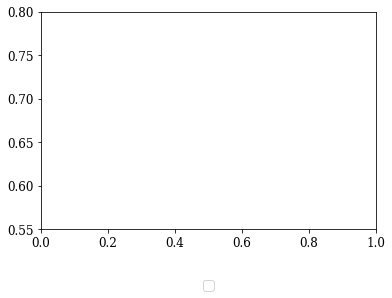

In [47]:
from eval_plot_utils import cl_plot_ds_size

val_mode = "test"

ax = cl_plot_ds_size(df, mode=val_mode)
import matplotlib.ticker as mticker
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.05))
if val_mode == "val":
    ax.set_ylim(0.58, 0.82)
else:
    ax.set_ylim(0.55, 0.8)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=2)



In [48]:
#  lr scale according to batch size reduction!
import matplotlib.pyplot as plt

orig_lr = 1e-4
orig_bs = 192


#ax = plt.figure().gca()
# for batch size 12

def eval_lr_scaling_bs(df, orig_lr, orig_bs, bs, ax=None):
    if ax is None:
        ax = plt.figure().gca()
        
    sub = df[df["batch_size"] == bs]
    sub = sub[sub["max_epochs"] == 10]
    sub = sub[sub["randomize_order"] == 1]
    sub = sub[sub["dataset_size"] == 1.0]
    
    sub["lr_downscale_factor"] =  orig_lr / sub["lr"]
    sub = sub[sub["lr_downscale_factor"] < 50]
    
    #sub.sort_values("lr_downscale_factor").plot("lr_downscale_factor", y="lin_probe_mean_test_auc", style="-X", ax =ax, label="bs=%d" % bs)


eval_lr_scaling_bs(df, orig_lr, orig_bs, 12, ax=ax)

eval_lr_scaling_bs(df, orig_lr, orig_bs, 48, ax=ax)

#eval_lr_scaling_bs(df, orig_lr, orig_bs, 192, ax=ax

# kind of stupid - just change grad accum steps!

[   6    8   12   32   24   48   64   96  960 1344  192  384  768  576
    2 1536]
[6, 8, 12, 32, 24, 48, 64, 96, 960, '1.3K', 192, 384, 768, 576, 2, '1.5K']


,batch_size,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,adjust_grad_acc_to,...,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,0.789374,0.752612,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,0.790316,0.755943,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,0.793162,0.758172,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,0.799242,0.762574,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,32,0.798772,0.762498,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,48,0.798158,0.763875,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,64,0.801637,0.768107,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,96,0.802175,0.769097,NaN,NaN,NaN,NaN,NaN,NaN,192.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,192,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,0.0,...,0.906133,0.906889,0.779005,0.810983,0.775323,0.80896,0.776876,0.807648,0.798729,0.855712


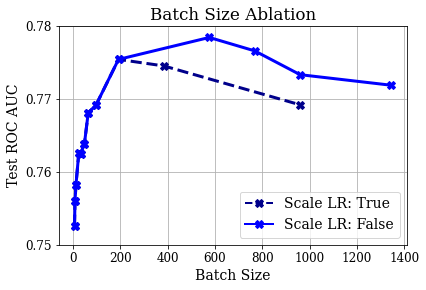

In [49]:
# eval perf according to batch size based on grad_acc

#  we do not scale the learning rate for batch sizes > 192,
# assuming linear scaling we should multiply the lr by the batch size increase factor

# select subset of df where adjust_grad_acc_to is not None
sub = df[df["max_epochs"] == 10]
sub = sub[sub["randomize_order"] == 1]
sub = sub[sub["dataset_size"] == 1.0]
sub = sub[sub["sl_dataset_size"] == 1.0]
sub = sub[sub["mixup_alpha"] == 0.0]
sub = sub[sub["adapter_flow"] == "easy"]
sub = sub[sub["mode"] == "adapters"]


# filter by lr when we have a batch size of <= 192 (means we are working only on one gpus)
sub = sub[(sub["num_gpus"] > 1) | (sub["lr"] == 3e-4)]


# drop cases where num_gpus > 1 and we do not use ddp
sub = sub[(sub["num_gpus"] == 1) | (sub["strategy"] == "ddp")]

# drop cases where num_gpus > 1 and we do not use a constant lr
#sub = sub[(sub["num_gpus"] == 1) | (sub["lr"] != 3e-4)]

# if we use ddp and num_gpus > 1, then the effective batch size is multiplied by the num_gpus
effective_bs = sub["batch_size"] * sub["num_gpus"]
sub["batch_size"][sub["strategy"] == "ddp"] = effective_bs

ax = plt.figure().gca()
for scale in [True, False]:
    # if we use a batch size larger than 192, the learning rate needs to be smaller than 3e-4
    if scale:
        plot_df = sub[(sub["batch_size"] <= 192) | (sub["lr"] != 3e-4)]
    else:
        plot_df = sub[(sub["batch_size"] <= 192) | (sub["lr"] == 3e-4)]



    #print(clean_df(sub[sub["batch_size"] == 192]))
    #print(clean_df(sub).columns)
    #print(clean_df(sub)[["batch_size", "lr", "lin_probe_mean_test_auc"]])

    plot_df = plot_df.groupby("seed").apply(lambda x: x.groupby("batch_size").mean().reset_index()).reset_index(drop=True)
    plot_df = clean_df(plot_df)
    plot_df = plot_df.groupby("batch_size").mean().reset_index().sort_values("batch_size")

    color = "darkblue" if scale else "blue"
    style = "--" if scale else "-"
    import copy
    style_kwargs = copy.deepcopy(style_kwargs)
    style_kwargs["linestyle"] = style
    #ax = plt.figure(figsize=(7,4)).gca()
    ax = plot_df.plot(x="batch_size", y="lin_probe_mean_test_auc", ax=ax, label=f"Scale LR: {scale}", color=color,
                      **style_kwargs)
# disable  legend
#ax.legend_.remove()

#plt.xscale("log", base=2)


import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
#plt.ylim(0.75, 0.78)
plt.tight_layout()
# show x ticks that were actually used
ticks = sub["batch_size"].unique()
print(ticks)
ticks = [str(round(t / 1000, 1)) + "K" if t > 1000 else t for t in ticks]
print(ticks)
#ax.set_xticks(ticks)
#ax.set_yticks(sub["lin_probe_mean_test_auc"].unique())
# set sparser y ticks 
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.01))

# reduce font size of x ticks
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
    
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)

plt.ylim(0.75, 0.78)
plt.ylabel("Test ROC AUC")
plt.xlabel("Batch Size")
plt.title("Batch Size Ablation")
sub

# increase thickness of lines
for line in ax.lines:
    line.set_linewidth(3)

plt.savefig(f"{save_folder}/batch_size_ablation.pdf", bbox_inches="tight")

plot_df



In [ ]:

sub = df[df["mixup_alpha"] == 0.1]
sub = sub[sub["max_epochs"] == 30]
sub = sub[sub["dataset_size"] == 1.0]
sub
#clean_df(sub)
#sub[["max_epochs", "seed", "lin_probe_mean_test_auc", "mixup_alpha", "randomize_order",]].sort_values("max_epochs")


,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,mode,lr,...,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc,cyclic_lambda
0,0.80594,0.772147,0.633539,0.636372,0.610473,0.621855,0.623814,0.631471,adapters,0.0003,...,0.90424,0.767425,0.799452,0.765509,0.798942,0.688121,0.74316,0.79891,0.87132,0.0


In [ ]:
df.columns

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'mode',
       'lr', 'sent_frac', 'randomize_order', 'max_epochs', 'batch_size',
       'adjust_grad_acc_to', 'dataset_size', 'sl_dataset_size',
       'text2img_num_steps', 'text2img_num_feats', 'mixup_alpha',
       'adapter_flow', 'seed', 'num_gpus', 'strategy',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc', 'cyclic_lambda'],
      dtype='object')

0.0
   lin_probe_mean_test_auc
0                 0.001003
1                 0.002268
2                 0.001330
3                 0.000342


0.1
   lin_probe_mean_test_auc
0                 0.000254
1                 0.000091
2                      NaN
3                 0.001393


0.2
   lin_probe_mean_test_auc
0                 0.000943
1                      NaN
2                      NaN


0.3
   lin_probe_mean_test_auc
0                 0.000703
1                 0.000398
2                      NaN


0.5
   lin_probe_mean_test_auc
0                      NaN


0.6
   lin_probe_mean_test_auc
0                      NaN
1                      NaN




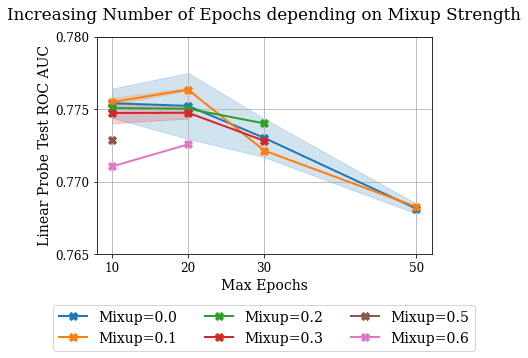

In [ ]:
# : eval mixup!

ds_size = 1.0

sub = df[df["randomize_order"] == 1]
sub = sub[sub["dataset_size"] == ds_size]
if ds_size < 1:
    sub = sub[sub["fixed_ds_subsampling_seed"] == 1]
sub = sub[sub["sl_dataset_size"] == 1.0]

sub = sub[sub["adapter_flow"] == "easy"]
sub = sub[sub["mode"] == "adapters"]
#sub = sub[sub["mixup_alpha"] != 0]
sub = sub[sub["lr"] == 3e-4]
sub = sub[sub["batch_size"] == 192]
sub = sub[sub["num_gpus"] == 1]
sub = sub[sub["randomize_order"] == 1]
sub = sub[sub["sent_frac"] == 1]
sub = sub[sub["cyclic_lambda"] == 0]

epochs = [10, 20, 30, 50]
# max_epochs should be one of the above
sub = sub[sub["max_epochs"].isin(epochs)]

#print(clean_df(sub))

# x axis is epochs, y is performance, hue is mixup_alpha
sub = sub.sort_values("max_epochs")

metrics = ["lin_probe_mean_test_auc"]#, "test_zero_shot_auc_averaged"]

#metrics = ["test_zero_shot_auc_averaged"]

alphas = []
mean_evals = []

ax = plt.figure().gca()
for mixup_alpha in sorted(sub["mixup_alpha"].unique()):#[0, 0.1, 0.2, 0.3]:
    sub_alpha = sub[sub["mixup_alpha"] == mixup_alpha]
    sub_alpha = sub_alpha.sort_values("max_epochs")
    
    
    #print(clean_df(sub_alpha).sort_values("max_epochs"))

    sub_alpha = sub_alpha.groupby("seed").apply(lambda x: x.groupby("max_epochs").mean().reset_index()).reset_index(drop=True)
    means = sub_alpha.groupby("max_epochs").mean().reset_index()
    stds = sub_alpha.groupby("max_epochs").std().reset_index()#["lin_probe_mean_test_auc"]
    
    print(mixup_alpha)
    print(stds[metrics])
    print()
    print()
    
    # set color gradient dependend on mixup_alpha that is easily distinguishable
    cmap = plt.get_cmap("tab20")
    color = cmap(mixup_alpha)
    means.plot(x="max_epochs", y=metrics,  ax = ax, label = [f"Mixup={mixup_alpha}"], color=color,# metric={metric}" for metric in metrics], color=color,
               **style_kwargs)
    
    # add error bars
    for metric in metrics:
        std = stds[metric]
        ax.fill_between(means["max_epochs"], means[metric] - std, means[metric] + std, color=color, alpha=0.2)

    # add x ticks where we have measurements
    if mixup_alpha == 0:
        ax.set_xticks(means["max_epochs"].unique())
    
# put legend to the right of the figure
#plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.title("Increasing Number of Epochs depending on Mixup Strength", y=1.05)
plt.ylabel("Linear Probe Test ROC AUC")
plt.xlabel("Max Epochs")


plt.ylim(0.765, 0.78)
# y ticks are not too crowded
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.005))

plt.savefig(f"{save_folder}/mixup_study_num_epochs.pdf", bbox_inches="tight")

In [ ]:
sub.columns

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'mode',
       'lr', 'sent_frac', 'randomize_order', 'max_epochs', 'batch_size',
       'adjust_grad_acc_to', 'dataset_size', 'sl_dataset_size',
       'text2img_num_steps', 'text2img_num_feats', 'mixup_alpha',
       'adapter_flow', 'seed', 'num_gpus', 'strategy',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc', 'cyclic_lambda'],
      dtype='object')

Index(['mixup_alpha', 'lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged',
       'sl_dataset_size', 'text2img_num_steps', 'text2img_num_feats', 'seed',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc'],
      dtype='object')
test_zero_shot_auc_averaged
0    0.651810
1    0.659927
2    0.666051
3    0.657376
4    0.665833
5    0.654932
Name: test_zero_shot_auc_averaged, dtype: float64
0    3.504496
1    2.488194
2    2.481066
3    1.608004
4         NaN
5         NaN
Name: test_zero_shot_auc_averaged, d

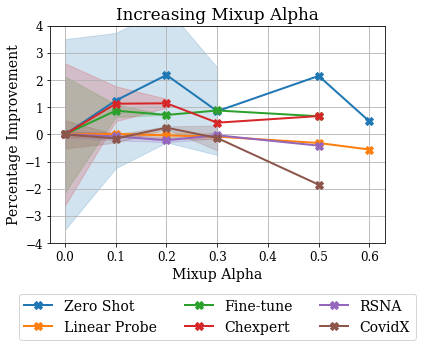

In [ ]:
# comparable to the mixup trials
ds_size = 1.0

sub = df[df["randomize_order"] == 1]
if ds_size < 1:
    sub = sub[sub["fixed_ds_subsampling_seed"] == 1]
sub = sub[sub["dataset_size"] == 1.0]
sub = sub[sub["adapter_flow"] == "easy"]
sub = sub[sub["mode"] == "adapters"]
sub = sub[sub["lr"] == 3e-4]
sub = sub[sub["max_epochs"] == 10]
sub = sub[sub["batch_size"] == 192]
sub = sub[sub["num_gpus"] == 1]
sub = sub.groupby("seed").apply(lambda x: x.groupby("mixup_alpha").mean().reset_index()).reset_index(drop=True)
means = sub.groupby("mixup_alpha").mean().reset_index()
means = clean_df(means).sort_values("mixup_alpha")

print(means.columns)
metrics = ["test_zero_shot_auc_averaged", "lin_probe_mean_test_auc", "adapters_test_auc", "chexpert_mean_test_auc", "rsna_mean_test_auc", "covidx_mean_test_auc"]

clean_labels = ["Zero Shot", "Linear Probe", "Fine-tune", "Chexpert", "RSNA", "CovidX"]

ax = plt.figure().gca()
for i, metric in enumerate(metrics):
    baseline = means[metric].iloc[0]
    means["metric"] = (means[metric] - baseline) / baseline * 100
    print(metric)
    print(means[metric])
    means.plot(x="mixup_alpha", y="metric", ax=ax, label=clean_labels[i], **style_kwargs)
    
    
    # error bar
    std = sub.groupby("mixup_alpha").std().reset_index()[metric] / baseline * 100
    print(std)
    color = ax.lines[-1].get_color()
    ax.fill_between(means["mixup_alpha"], means["metric"] - std, means["metric"] + std, color=color, alpha=0.2)
    
    # make y tick spacig 0.1
    #ax.yaxis.set_major_locator(mticker.MultipleLocator(0.01))
    #plt.show()
    
plt.title(f"Increasing Mixup Alpha")
plt.ylabel("Percentage Improvement")
plt.xlabel("Mixup Alpha")
plt.ylim(-4, 4)
clean_df(means)
# move legend to the bottom of figure
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)
plt.savefig(f"{save_folder}/mixup_study_alpha.pdf", bbox_inches="tight")

In [ ]:
#: eval mixup when using lower dataset size with more epochs -> not really necessary, should also give benefits on full data tbh


In [ ]:
# TODO: eval zero-shot

In [ ]:
clean_df(df[df["sl_dataset_size"] != 1.0])

,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,lr,max_epochs,batch_size,dataset_size,sl_dataset_size,seed,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc
0,0.613736,0.571651,0.449774,0.478804,0.461332,0.483848,0.451569,0.479963,0.00001,1,8,0.003,0.10,0,NaN,NaN,NaN,NaN,NaN,NaN
0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,0.00030,10,192,1.000,0.30,60,0.771787,0.799435,0.768324,0.803199,0.715327,0.765522
0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,0.00030,10,192,1.000,0.03,60,0.745835,0.774045,0.742652,0.771436,0.622648,0.672161
0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,0.00030,10,192,1.000,0.10,60,0.761553,0.786635,0.758785,0.793463,0.650044,0.705475
0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,0.00030,10,192,1.000,0.01,60,0.705913,0.750976,0.706582,0.757116,0.588000,0.604032


,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,text2img_num_steps,text2img_num_feats,seed,fixed_ds_subsampling_seed,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc
sl_dataset_size,,,,,,,,,,,,,,,,,,
0.01,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,4.000000,60.000000,1.000000,0.705913,0.750976,0.706582,0.757116,0.588000,0.604032
0.03,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,4.000000,60.000000,1.000000,0.745835,0.774045,0.742652,0.771436,0.622648,0.672161
0.10,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,4.000000,60.000000,1.000000,0.761553,0.786635,0.758785,0.793463,0.650044,0.705475
0.30,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,4.000000,60.000000,1.000000,0.771787,0.799435,0.768324,0.803199,0.715327,0.765522
1.00,0.806976,0.775410,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,136.363636,0.363636,11.818182,0.818182,0.779005,0.810983,0.775323,0.808960,0.776876,0.807648


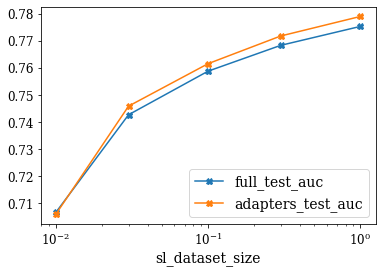

In [ ]:
# eval with fewer sl max epochs
# merge with other dataset size plots

full_df = df[df["dataset_size"] == 1.0]
full_df = full_df[full_df["randomize_order"] == 1]
full_df = full_df[full_df["lr"] == 3e-4]
full_df = full_df[full_df["mode"] == "adapters"]
full_df = full_df[full_df["adapter_flow"] == "easy"]
full_df = full_df[full_df["num_gpus"] == 1]
full_df = full_df[full_df["mixup_alpha"] == 0]
full_df = full_df[full_df["batch_size"] == 192]
full_df = full_df[full_df["max_epochs"] == 10]

full_df = full_df.groupby("seed").apply(lambda x: x.groupby("sl_dataset_size").mean().reset_index()).reset_index(drop=True)

full_df = clean_df(full_df).sort_values("sl_dataset_size")

metrics = ["full_test_auc", "adapters_test_auc"]

means = full_df.groupby("sl_dataset_size").mean()
ax = means.reset_index().plot(x="sl_dataset_size",
                                                             y=metrics,
                                                            #"covid_mean_test_auc"],
                                                             style="-X")
plt.xscale("log", base=10)
clean_df(means)



Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'lr',
       'text2img_num_steps', 'text2img_num_feats', 'mixup_alpha', 'seed',
       'fixed_ds_subsampling_seed', 'covidx_mean_val_auc',
       'covidx_mean_test_auc', 'rsna_mean_val_auc', 'rsna_mean_test_auc',
       'adapters_test_auc', 'adapters_val_auc', 'full_test_auc',
       'full_val_auc', 'new_adapters_test_auc', 'new_adapters_val_auc',
       'chexpert_mean_val_auc', 'chexpert_mean_test_auc'],
      dtype='object')
Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged', 'lr',
       'text2im

,lr,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,text2img_num_feats,...,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,0.00001,0.763737,0.709633,0.575110,0.601292,0.620105,0.616330,0.599598,0.612417,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00030,0.806904,0.775486,0.688691,0.659878,0.673242,0.658223,0.685471,0.662504,1.6,...,0.905478,0.906219,0.777545,0.808093,0.774694,0.80724,0.774774,0.804951,0.799692,0.86537


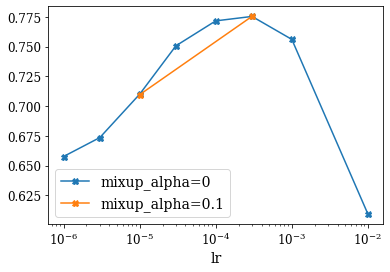

In [ ]:
# eval lr tune mixup with 0.1
sub = df[df["randomize_order"] == 1]
sub = sub[sub["dataset_size"] == ds_size]
sub = sub[sub["sl_dataset_size"] == 1.0]

sub = sub[sub["adapter_flow"] == "easy"]
sub = sub[sub["mode"] == "adapters"]
#sub = sub[sub["mixup_alpha"] != 0]
#sub = sub[sub["lr"] == 3e-4]
sub = sub[sub["batch_size"] == 192]
sub = sub[sub["num_gpus"] == 1]
sub = sub[sub["randomize_order"] == 1]
sub = sub[sub["sent_frac"] == 1]
sub = sub[sub["max_epochs"] == 10]

ax = plt.figure().gca()

for mixup_alpha in [0, 0.1]:
    
    sub_alpha = sub[sub["mixup_alpha"] == mixup_alpha]
    sub_alpha = clean_df(sub_alpha).sort_values("lr")

    #sub = sub.groupby("seed").apply(lambda x: x.groupby("lr").mean().reset_index()).reset_index(drop=True)
    means = sub_alpha.groupby("lr").mean().reset_index()

    means.plot(x="lr", y="lin_probe_mean_test_auc", style="-X", ax=ax, label=f"mixup_alpha={mixup_alpha}")
    plt.xscale("log", base=10)
    print(clean_df(sub).columns)
clean_df(sub)
means



In [ ]:
# TODO: eval Vit-L perf and RN50 perf

Index(['lin_probe_mean_val_auc', 'lin_probe_mean_test_auc',
       'val_zero_shot_auc_Impression:_', 'test_zero_shot_auc_Impression:_',
       'val_zero_shot_auc_FINDINGS:', 'test_zero_shot_auc_FINDINGS:',
       'val_zero_shot_auc_averaged', 'test_zero_shot_auc_averaged',
       'cyclic_lambda'],
      dtype='object')


<AxesSubplot:xlabel='cyclic_lambda'>

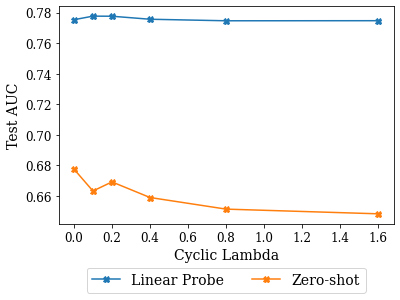

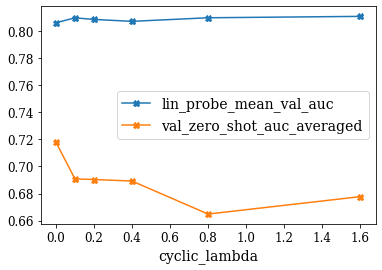

In [ ]:
# eval cyclic lambdas

sub = df[df["randomize_order"] == 1]
sub = sub[sub["dataset_size"] == ds_size]
sub = sub[sub["sl_dataset_size"] == 1.0]

sub = sub[sub["adapter_flow"] == "easy"]
sub = sub[sub["mode"] == "adapters"]
sub = sub[sub["mixup_alpha"] == 0]
sub = sub[sub["lr"] == 3e-4]
sub = sub[sub["batch_size"] == 192]
sub = sub[sub["num_gpus"] == 1]
sub = sub[sub["randomize_order"] == 1]
sub = sub[sub["sent_frac"] == 1]
sub = sub[sub["max_epochs"] == 11]  # for cyclic lambdas it is 11
#sub = sub[sub["cyclic_lambda"] ==]


sub = clean_df(sub).sort_values("cyclic_lambda")

print(sub.columns)


test_ax = sub.plot(x="cyclic_lambda", y="lin_probe_mean_test_auc", style="-X")
sub.plot(x="cyclic_lambda", y="test_zero_shot_auc_averaged", style="-X", ax=test_ax)
plt.ylabel("Test AUC")
plt.xlabel("Cyclic Lambda")
# put the legend below the figure with two columns
plt.legend(["Linear Probe", "Zero-shot"], ncol=2, loc="lower center", bbox_to_anchor=(0.5, -0.35))

# same for val metrics
val_ax = sub.plot(x="cyclic_lambda", y="lin_probe_mean_val_auc", style="-X")
sub.plot(x="cyclic_lambda", y="val_zero_shot_auc_averaged", style="-X", ax=val_ax)
